In [2]:
#Download libraries
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Download the data
df = pd.read_csv('../data/train_data.zip')
df.head()

,external_id,month,year,monthly_number_of_sessions,monthly_unique_sessions,monthly_repeated_sessions,monthly_avg_length_of_session,monthly_avg_light_activity,monthly_avg_moderate_activity,monthly_avg_vigorous_activity,...,avg_wind_9_10,avg_wind_10_11,avg_wind_11_12,avg_wind_12_above,perfect_days,unacast_session_count,hpi,state_and_local_amount_per_capita,state_amount_per_capita,local_amount_per_capita
0,1900203,3,2019,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,78.0,323.61,0.132207,0.018519,0.113688
1,1900203,6,2018,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,111.0,323.61,0.132207,0.018519,0.113688
2,1900203,8,2018,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,110.0,323.61,0.132207,0.018519,0.113688
3,MR00101775,1,2019,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,110.38,0.076247,0.011966,0.064281
4,MR00101775,8,2019,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,110.38,0.076247,0.011966,0.064281


In [4]:
#drop the columns that we are not going to study here
df_weather = df.drop(df.columns[[i for i in range(3, 793)]], axis=1)

In [5]:
df_weather.head()

,external_id,month,year,Democrats_08_Votes,Democrats_12_Votes,Republican_08_Votes,Republican_12_Votes,Republicans_2016,Democrats_2016,Green_2016,...,avg_wind_9_10,avg_wind_10_11,avg_wind_11_12,avg_wind_12_above,perfect_days,unacast_session_count,hpi,state_and_local_amount_per_capita,state_amount_per_capita,local_amount_per_capita
0,1900203,3,2019,7518.0,8478.0,5975.0,6463.0,39.013807,55.193951,0.966469,...,0.0,0.0,0.0,0.0,0.0,78.0,323.61,0.132207,0.018519,0.113688
1,1900203,6,2018,7518.0,8478.0,5975.0,6463.0,39.013807,55.193951,0.966469,...,0.0,0.0,0.0,0.0,4.0,111.0,323.61,0.132207,0.018519,0.113688
2,1900203,8,2018,7518.0,8478.0,5975.0,6463.0,39.013807,55.193951,0.966469,...,0.0,0.0,0.0,0.0,2.0,110.0,323.61,0.132207,0.018519,0.113688
3,MR00101775,1,2019,9276.0,9650.0,8651.0,8181.0,49.561824,48.845391,0.255869,...,0.0,0.0,0.0,0.0,0.0,10.0,110.38,0.076247,0.011966,0.064281
4,MR00101775,8,2019,9276.0,9650.0,8651.0,8181.0,49.561824,48.845391,0.255869,...,0.0,0.0,0.0,0.0,0.0,11.0,110.38,0.076247,0.011966,0.064281


In [69]:
df_weather.shape

(52626, 71)

In [70]:
df_weather.describe()

,month,year,Democrats_08_Votes,Democrats_12_Votes,Republican_08_Votes,Republican_12_Votes,Republicans_2016,Democrats_2016,Green_2016,Libertarians_2016,...,avg_wind_9_10,avg_wind_10_11,avg_wind_11_12,avg_wind_12_above,perfect_days,unacast_session_count,hpi,state_and_local_amount_per_capita,state_amount_per_capita,local_amount_per_capita
count,52626.000000,52626.000000,5.258400e+04,5.258400e+04,52584.000000,52584.000000,52584.000000,52584.000000,47817.000000,52584.000000,...,52625.000000,52625.000000,52625.000000,52625.000000,48488.000000,49967.000000,52626.000000,52626.000000,52626.000000,52626.000000
mean,5.857143,2018.428571,2.511879e+05,2.420785e+05,161876.019169,161770.427716,45.133999,49.546060,1.153054,3.385829,...,0.009216,0.003420,0.001368,0.001159,1.775223,135.281086,363.333280,0.142607,0.017662,0.124945
std,3.196542,0.494876,4.240251e+05,4.069781e+05,208818.029940,202063.386552,15.439479,15.705875,0.497582,1.082858,...,0.114052,0.068286,0.039451,0.035126,2.974338,534.126771,268.135357,0.053920,0.012470,0.052613
min,1.000000,2018.000000,4.500000e+02,3.460000e+02,415.000000,446.000000,4.122067,8.100626,0.130492,0.576831,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,62.050000,0.070614,0.000000,0.037019
25%,3.000000,2018.000000,3.139450e+04,2.984800e+04,32215.500000,34304.750000,34.637393,38.506535,0.811221,2.592388,...,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,205.510000,0.094705,0.008126,0.086578
50%,6.000000,2018.000000,1.090470e+05,1.014150e+05,88323.000000,88461.000000,43.348072,50.960154,1.072316,3.421792,...,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000,272.325000,0.132207,0.012953,0.113688
75%,8.000000,2019.000000,2.748800e+05,2.726128e+05,186832.000000,196888.000000,56.204687,61.126439,1.473836,4.008533,...,0.000000,0.000000,0.000000,0.000000,3.000000,123.000000,417.420000,0.164303,0.024017,0.151351
max,12.000000,2019.000000,2.295853e+06,2.216903e+06,956425.000000,885333.000000,87.844458,92.846592,4.599361,10.806091,...,4.000000,4.000000,3.000000,2.000000,27.000000,44860.000000,2299.780000,0.485204,0.063809,0.443315


In [78]:
#Names of columns containing NaNs
df_weather.columns[df_weather.isnull().any()]

Index(['Democrats_08_Votes', 'Democrats_12_Votes', 'Republican_08_Votes',
       'Republican_12_Votes', 'Republicans_2016', 'Democrats_2016',
       'Green_2016', 'Libertarians_2016', 'Poor_physical_health_days',
       'Poor_mental_health_days', 'Adult_smoking', 'Number_of_holidays',
       'weather_clear', 'weather_rain', 'weather_fog', 'weather_snow',
       'weather_thunder', 'weather_cloudy', 'weather_other',
       'temp_avg_35_below', 'temp_avg_35_45', 'temp_avg_45_55',
       'temp_avg_55_65', 'temp_avg_65_75', 'temp_avg_75_85', 'temp_avg_85_95',
       'temp_avg_95_above', 'temp_max_35_below', 'temp_max_35_45',
       'temp_max_45_55', 'temp_max_55_65', 'temp_max_65_75', 'temp_max_75_85',
       'temp_max_85_95', 'temp_max_95_above', 'temp_min_35_below',
       'temp_min_35_45', 'temp_min_45_55', 'temp_min_55_65', 'temp_min_65_75',
       'temp_min_75_85', 'temp_min_85_95', 'temp_min_95_above',
       'precip_mm_none', 'precip_mm_0_1', 'precip_mm_1_10',
       'precip_mm_10_ab

In [81]:
#Create a dataframe with the percentage of NaNs per column
count_na = pd.DataFrame(df_weather.isnull().sum()/df_weather.shape[0], columns=['number_of_NaNs'])

In [82]:
count_na[count_na['number_of_NaNs'] > 0].sort_values('number_of_NaNs',ascending = False)

,number_of_NaNs
Number_of_holidays,0.383670
Green_2016,0.091381
perfect_days,0.078630
unacast_session_count,0.050526
Poor_mental_health_days,0.014366
...,...
temp_max_45_55,0.000019
temp_max_55_65,0.000019
temp_max_75_85,0.000019
temp_max_85_95,0.000019


**Observation** : NaNs represent less than 10% of the data under study for all the features, except for the `Number_of_holidays` category where it represents 38%.

In [106]:
#Dataframe with `Number_of_holidays` == NaNs
null_holiday = df_weather[df_weather.isnull()['Number_of_holidays']]

In [121]:
#df_jan_19 contains all the rows corresponding to january 2019
df_jan_19 = df_weather[(df_weather['month'] == 1) & (df_weather['year'] == 2019)]

In [128]:
df_jan_19['Number_of_holidays'].isnull().sum()

11

In [137]:
df_jan_19.shape

(2506, 71)

In [136]:
df_jan_19['Number_of_holidays'].unique()

array([ 2., nan])

**Observation** : for a given month during a given year, there are either identical values or NaNs, maybe we could fill up the blanks using the other values of the table. Here for example, in January 2019, all the values are 2, except for 11 values that are NaNs.

In [138]:
#Dataframe with `Green_2016` == NaNs
null_green = df_weather[df_weather.isnull()['Green_2016']]

In [143]:
null_green.drop(null_green.columns[[i for i in range(11, 71)]], axis=1)

,external_id,month,year,Democrats_08_Votes,Democrats_12_Votes,Republican_08_Votes,Republican_12_Votes,Republicans_2016,Democrats_2016,Green_2016,Libertarians_2016
37,FM00166988,3,2018,254594.0,238224.0,65581.0,64392.0,16.064771,80.822723,NaN,3.112505
51,FM00170681,3,2018,39178.0,37252.0,33857.0,34406.0,50.618365,43.835957,NaN,5.545678
52,FM00170681,12,2018,39178.0,37252.0,33857.0,34406.0,50.618365,43.835957,NaN,5.545678
60,aaf680dd-b6cc-4380-aec0-96e66e8ad30a,2,2019,253958.0,272262.0,153848.0,171668.0,33.410923,63.282045,NaN,3.307032
61,aaf680dd-b6cc-4380-aec0-96e66e8ad30a,5,2018,253958.0,272262.0,153848.0,171668.0,33.410923,63.282045,NaN,3.307032
...,...,...,...,...,...,...,...,...,...,...,...
52526,b0d68b7d-77b2-4e68-8ff6-7d40a1583ecb,11,2018,2614.0,1958.0,8408.0,8926.0,82.317313,15.377960,NaN,2.304727
52527,b0d68b7d-77b2-4e68-8ff6-7d40a1583ecb,7,2019,2614.0,1958.0,8408.0,8926.0,82.317313,15.377960,NaN,2.304727
52528,b0d68b7d-77b2-4e68-8ff6-7d40a1583ecb,4,2019,2614.0,1958.0,8408.0,8926.0,82.317313,15.377960,NaN,2.304727
52609,FM00166612,3,2019,31384.0,33171.0,52507.0,56138.0,64.789400,32.656632,NaN,2.553967


**Observation** : I would substitute null values by 0 to start, as we can see that for most of the rows, the value would be less than 1%. 

In [4]:
#Dataframe with `unacast_session_count` == NaNs
null_uni_count = df_weather[df_weather.isnull()['unacast_session_count']]

In [5]:
null_uni_count.shape

(2659, 71)

In [6]:
#Months for which there are NaNs values for unicast_session_count
null_uni_count['month'].unique()

array([ 1,  8,  4, 11,  2, 12,  3,  7,  9,  5, 10,  6], dtype=int64)

In [7]:
#Number of NaNs values corresponding to January 2018
null_uni_count[(null_uni_count['month'] == 1) & (null_uni_count['year'] == 2018)].shape

(2042, 71)

**Observations** : Most of the missing values correspond to January 2018.

In [8]:
#Let's consider the values that don't correspond to January 2018
count_null_uni_count = null_uni_count[(null_uni_count['month'] != 1) | (null_uni_count['year'] != 2018)]['external_id'].value_counts()

In [15]:
#Number of missing values per playground
df_missing_uni_count = pd.DataFrame(count_null_uni_count)
df_missing_uni_count.to_csv('../data/missing_unicast_count')
df_missing_uni_count

,external_id
MR00101262,19
MR00105990,18
MR00110941,18
MR00117367,16
e5bdd7bc-325a-4f88-ad22-a3a820118b68,15
...,...
MR00108096,1
1807156,1
FM00167520,1
FM00162852,1


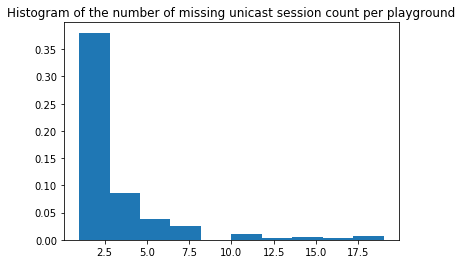

In [187]:
plt.hist(count_null_uni_count.values, density=True)
plt.title("Histogram of the number of missing unicast session count per playground")
plt.show()

**Observations** : We can see that most playground that have missing values for the `unicast_session_count` miss less than 3 values, but some playground only have 3 or 4 values that are not NaNs. We will have to understand why those data are missing, and find out how we want to deal with them. 